## <font color='blue'>Part 1: ERP Preprocessing</font>
### 1. Cotinuous single channel EEG
### 2. Segmentation using the marker (Trigger information)
### 3. Baseline Correction
### 4. Signed r-square value (statistical differences over the time)



## <font color='blue'>Part 2: ERP classificatoin</font>
### 1. Mean amplitude feature
### 2. Why LDA classifier is optimal?
### 3. Unbalanced classes; sensitivity, specificity, AUC

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## Cz and Oz channels
mat = scipy.io.loadmat('cnt.mat')
cnt = np.array(mat.get('cnt1'))

mat_Y = scipy.io.loadmat('label.mat')
Label = np.array(mat_Y.get('label'))

mat_m = scipy.io.loadmat('marker.mat')
marker = np.array(mat_m.get('marker'))

## From the continuous EEG signal, we should know the exact time points where the evens were occurred. 
## Additionally we should also know the type of the event (i.e., label)

![segment.PNG](attachment:segment.PNG)

In [2]:

# Duration of the session can be calculated as len(cnt) / 60 / fs(100)
print(np.shape(cnt))
print(np.shape(Label))
print(np.shape(marker))

print(Label)
print(marker)

(92244, 2)
(2, 1980)
(1, 1980)
[[0 0 0 ... 1 0 0]
 [1 1 1 ... 0 1 1]]
[[17298 17308 17329 ... 84318 84340 84361]]


In [ ]:
92244/60/100

15.374

## Let's see the continuous EEG signals with marker information. 
## We have binary classes: Target and Non-target
## The ratio of the classes is 1:5 for taraget and non-target in Speller system

![speller.jpg](attachment:speller.jpg)

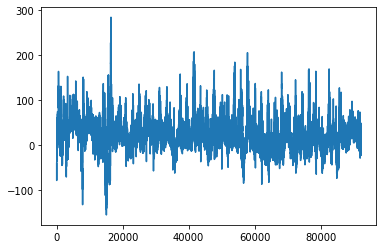

In [3]:

plt.plot(cnt[:,0])


## Now we segment the *'cnt'* from -200 to 1000 ms with respect to the stimulus onset (time points)


(-10.0, 60.0)

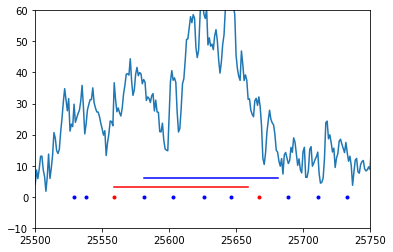

In [4]:
plt.plot(cnt[:,0])
plt.plot(marker[0, Label[0, :] == 1], np.zeros(330) , 'r.')
plt.plot(marker[0, Label[0, :] == 0], np.zeros(1650) , 'b.')
plt.plot([25559,25559+100], [3, 3] , 'r-')
plt.plot([25581,25581+100], [6, 6] , 'b-')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 
plt.xlim([25500, 25750])
plt.ylim([-10, 60])

![average.PNG](attachment:average.PNG)

## We perform the segmentation. cnt -> epoch 

In [5]:
erp = list()
for i in range(np.size(Label, 1)):
    ival = range(marker[0, i]-20, marker[0, i]+100)
    erp.append( cnt[ival, 0] )

## Now we plot all individual ERP responses
## The EEG signales can be shifted, biased, noised

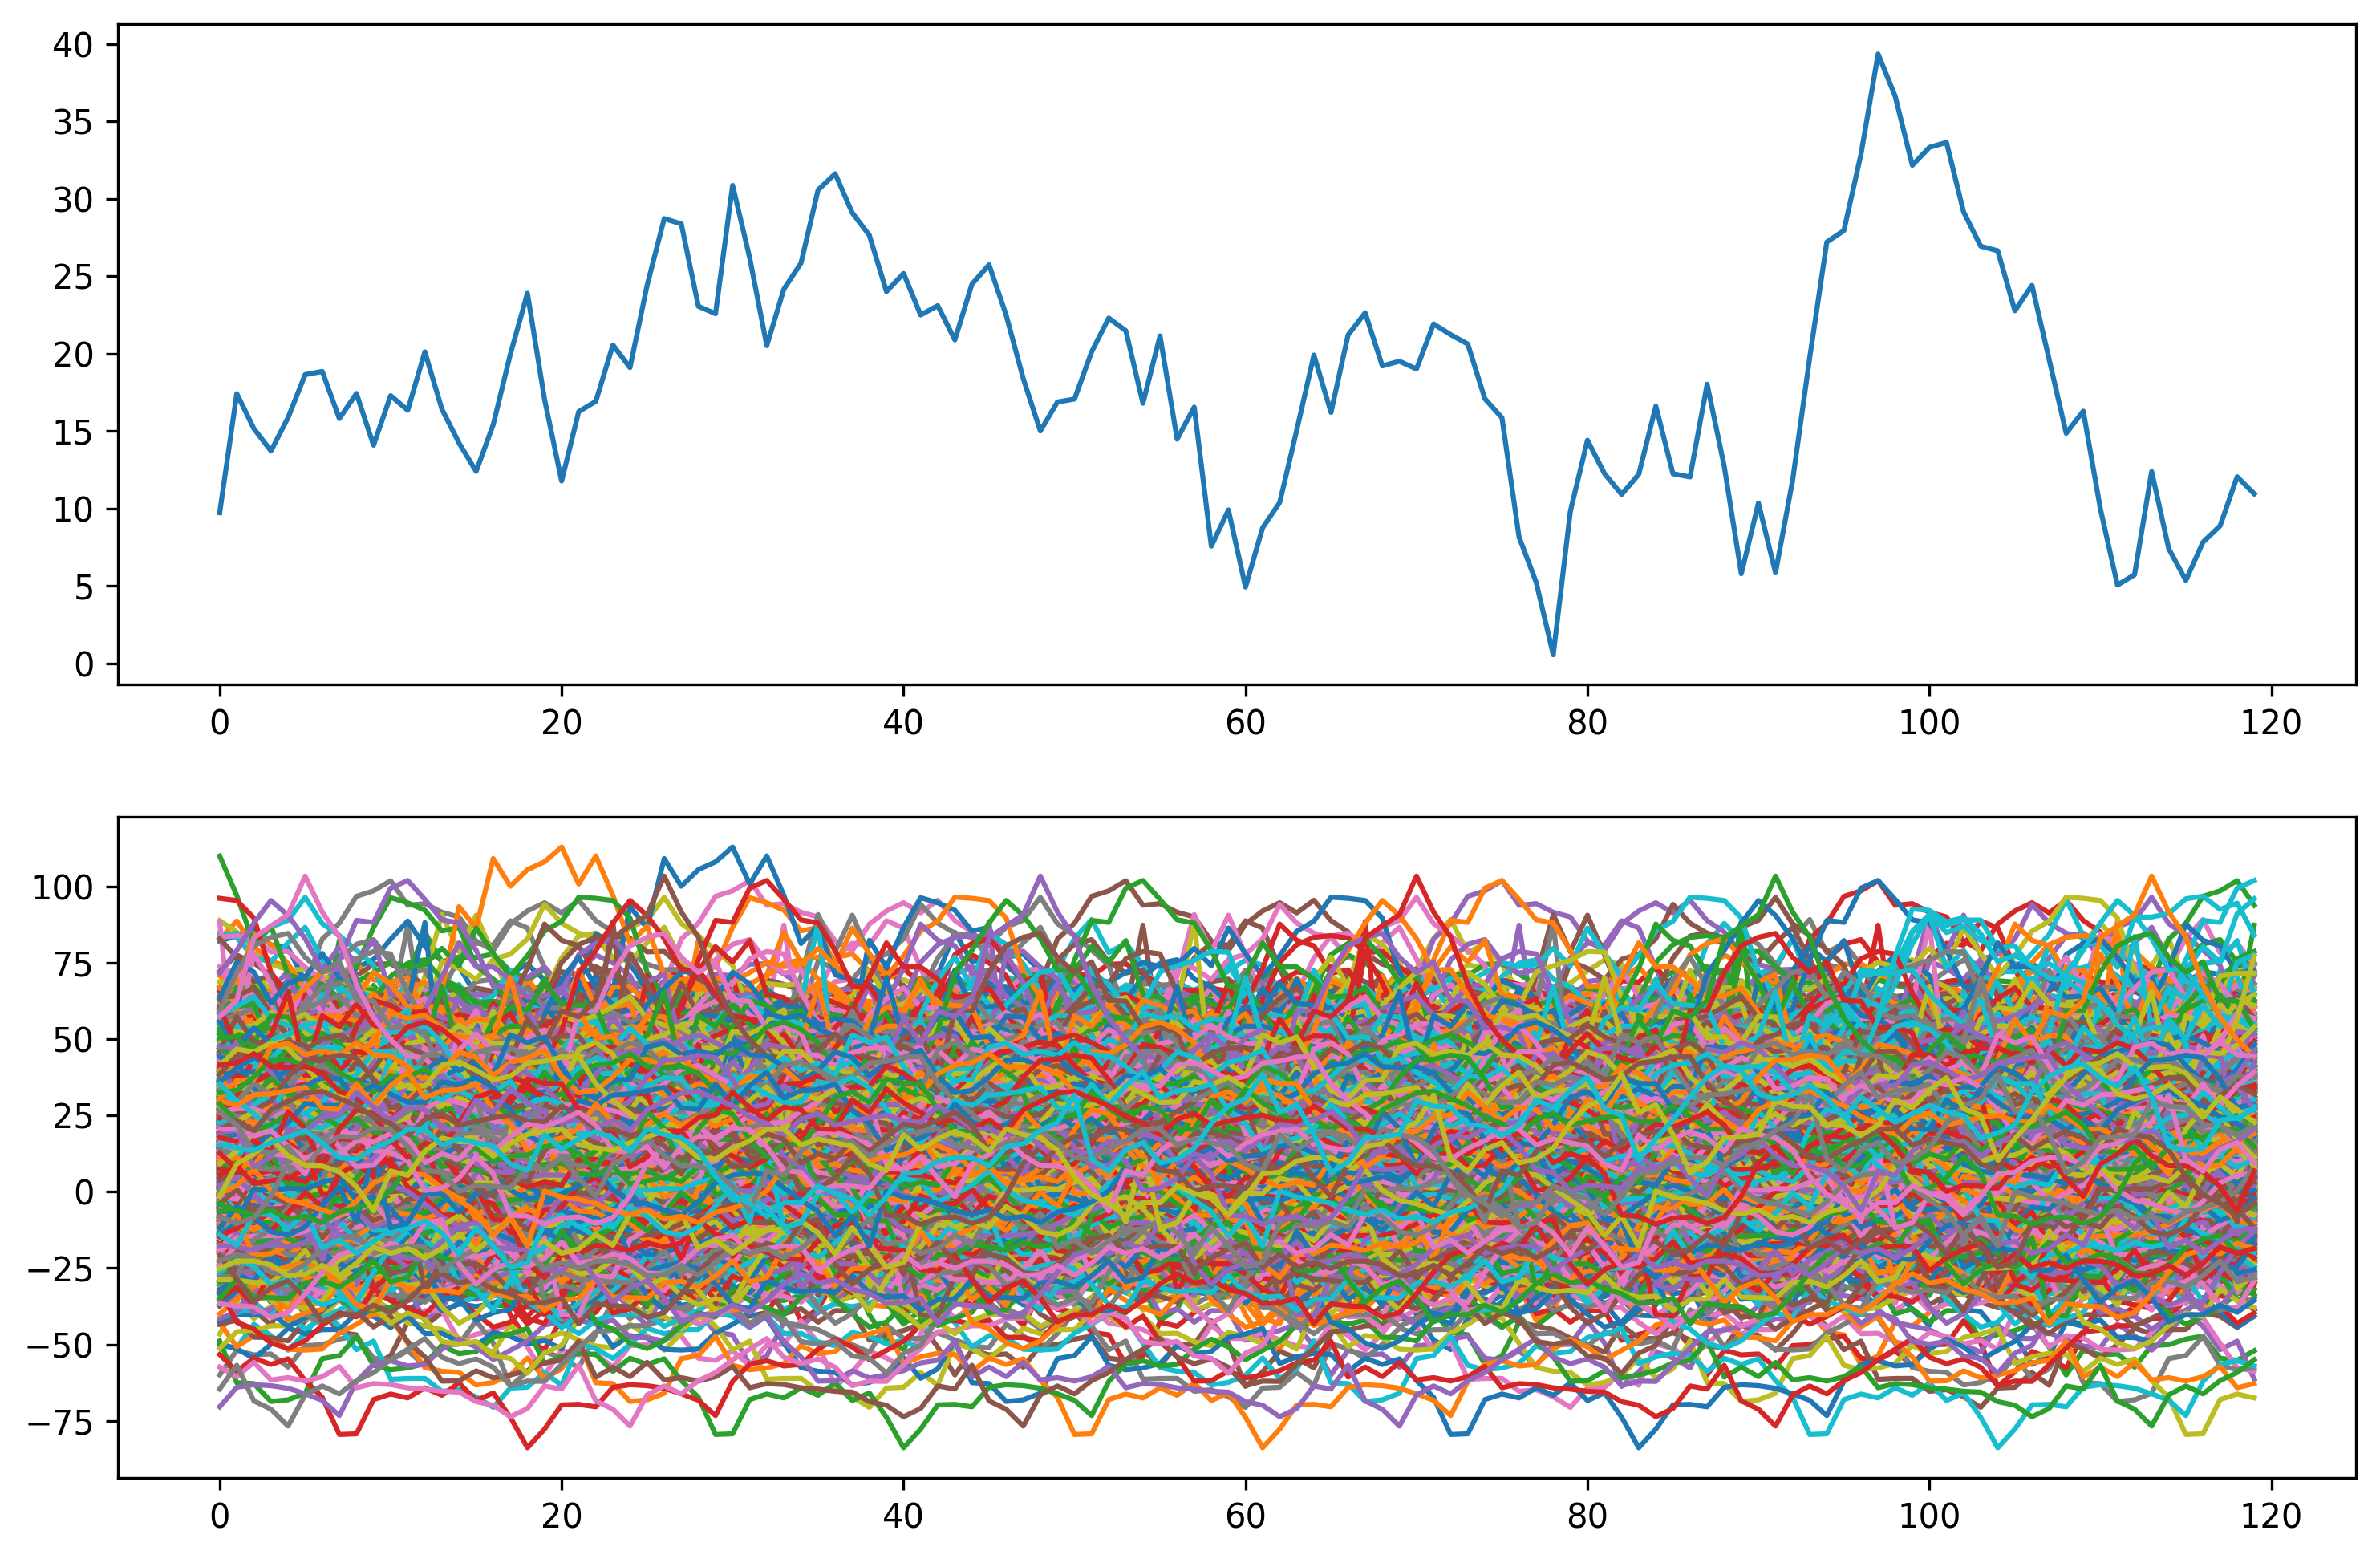

In [6]:
tm = np.array(erp)
plt.subplot(2, 1, 1)
plt.plot(tm[100,:]) # plt.plot(tm[1000,:])
plt.subplot(2, 1, 2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 
for i in range(np.size(tm, 0)):
    plt.plot(tm[i,:])

## Why we included the [-200 to 0] time interval?
## We assumed that -200 0 interval is idle brain state, amplitude will be shifted into the baseline by substracting the mean(-200 - 0) signals to entire ERP 

![baseline.PNG](attachment:baseline.PNG)

In [7]:
erp_base = list()
for i in range(len(erp)):
    erp_base.append(erp[i] - np.mean(erp[i][0:20]))

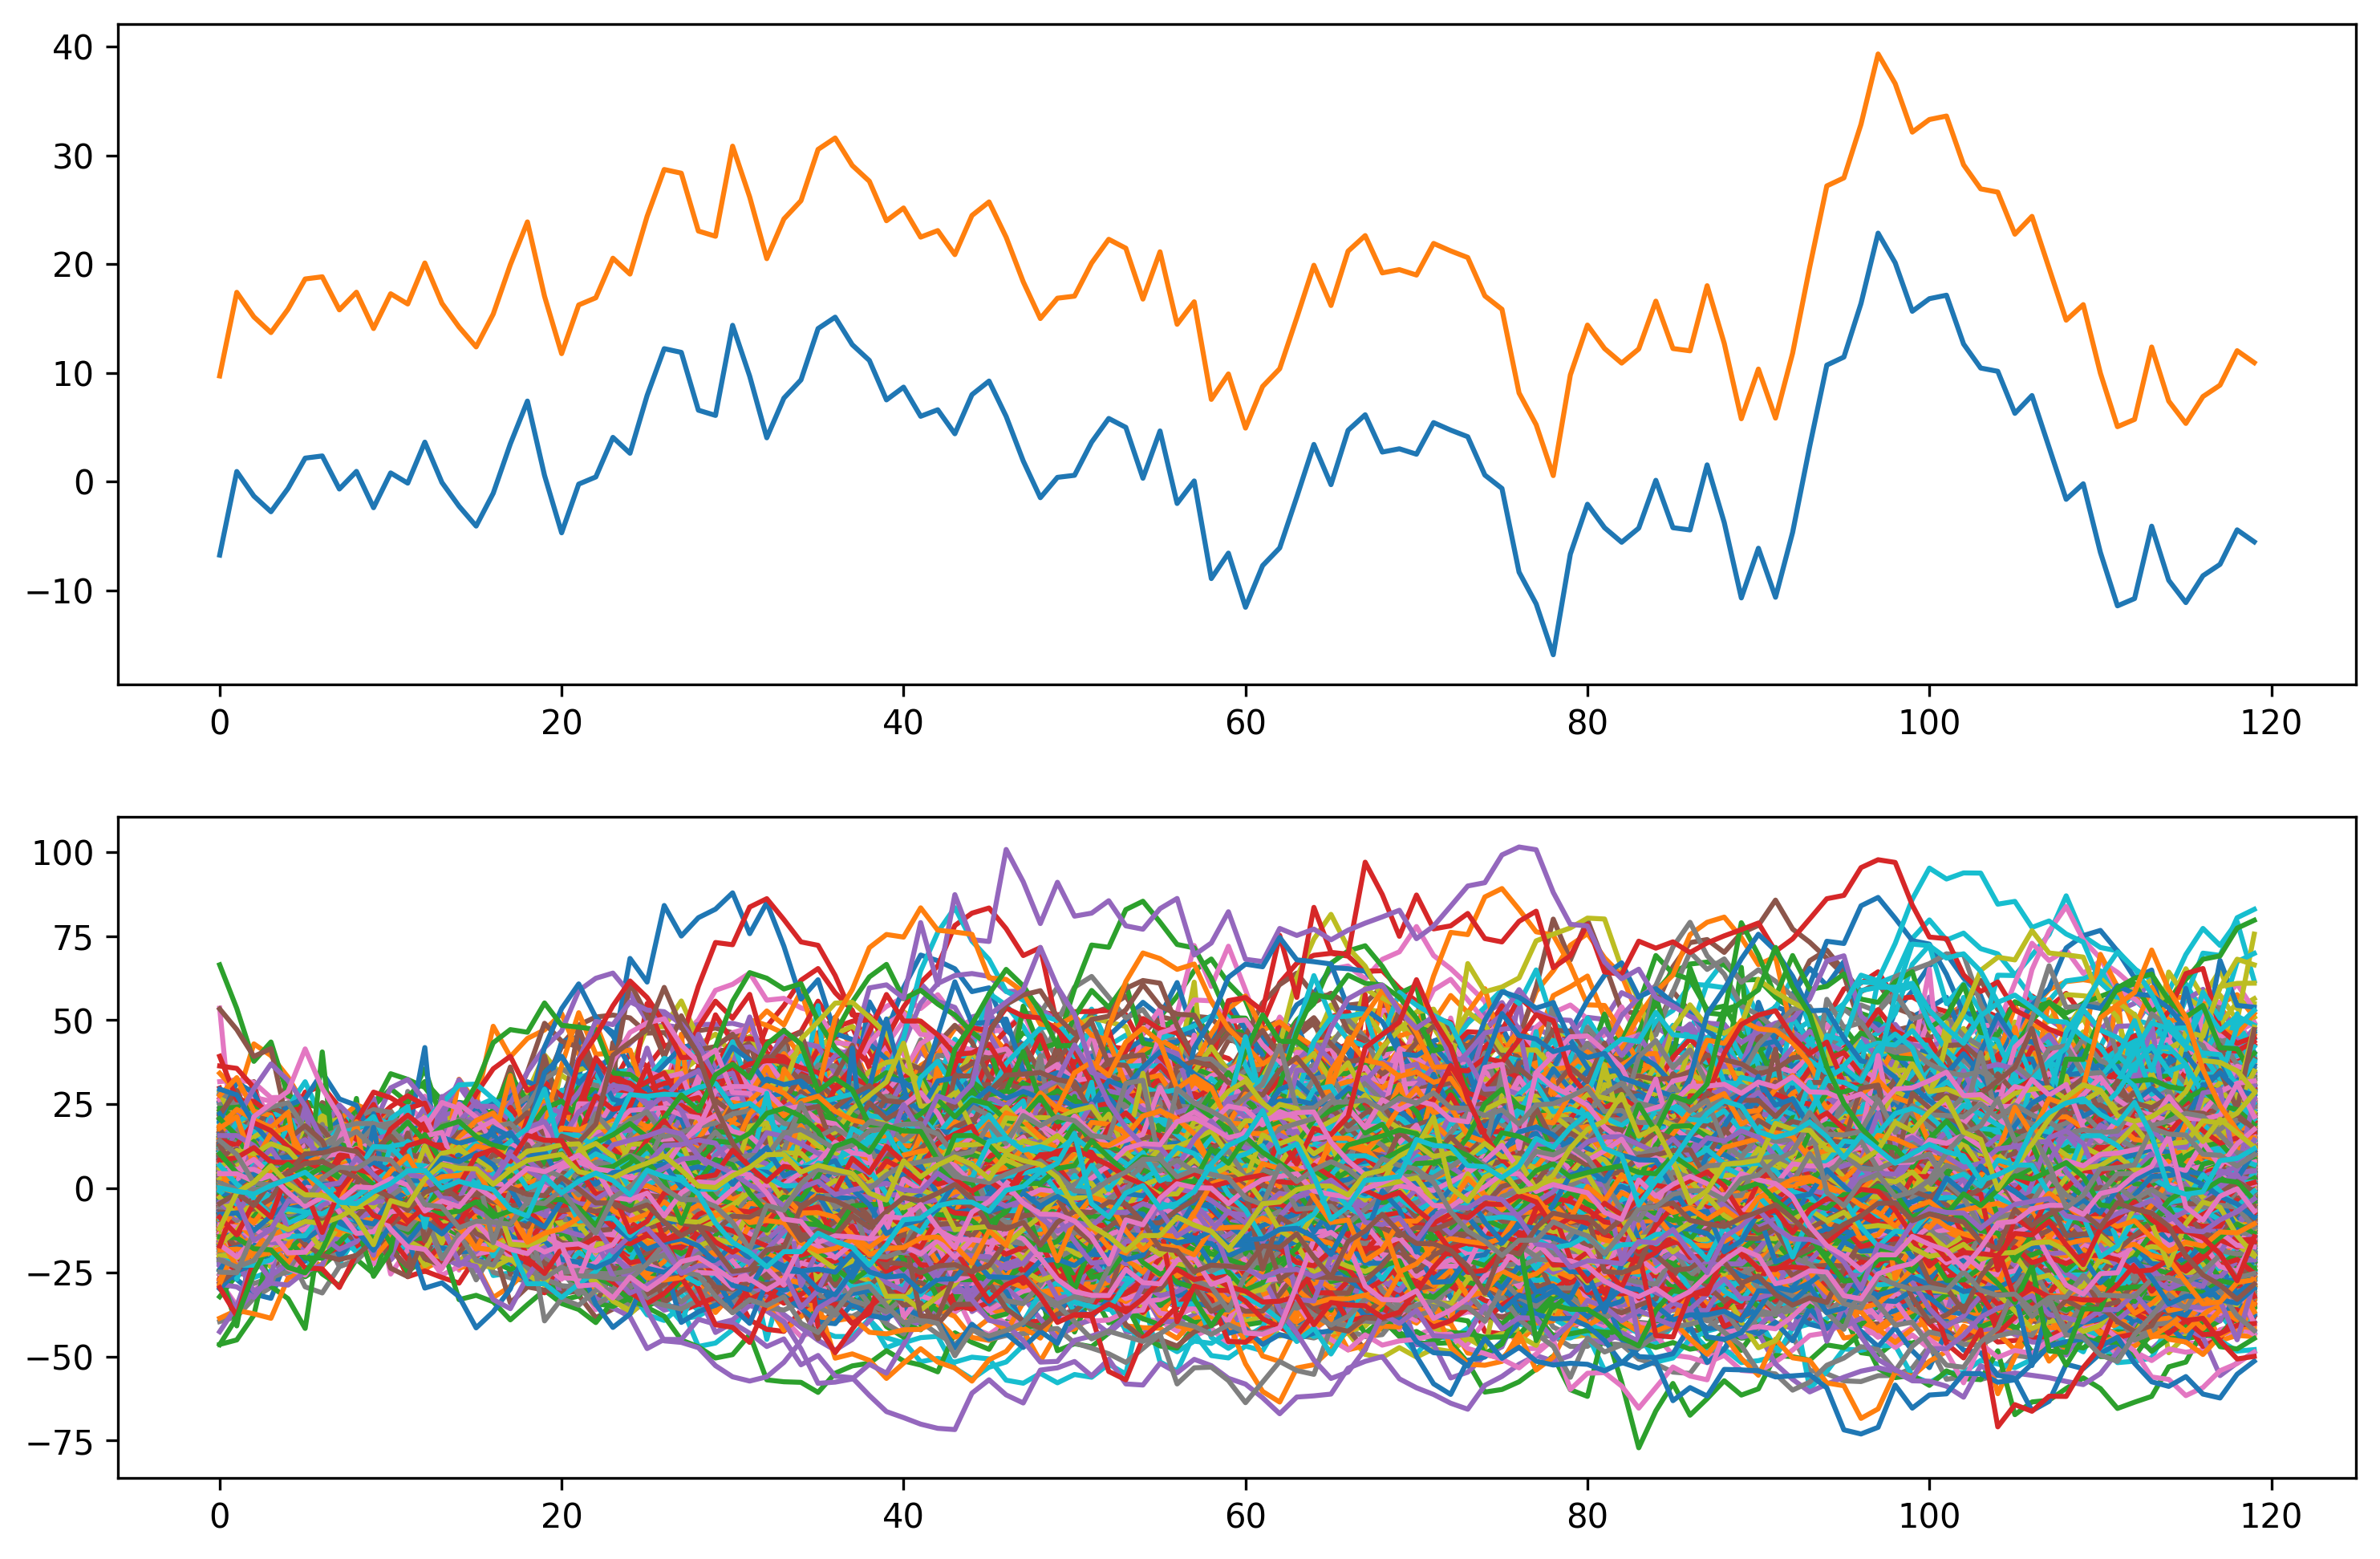

In [8]:
tm1 = np.array(erp)
tm = np.array(erp_base)
plt.subplot(2, 1, 1)
plt.plot(tm[100,:])
plt.plot(tm1[100,:])
plt.subplot(2, 1, 2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 
for i in range(np.size(tm, 0)):
    plt.plot(tm[i,:])

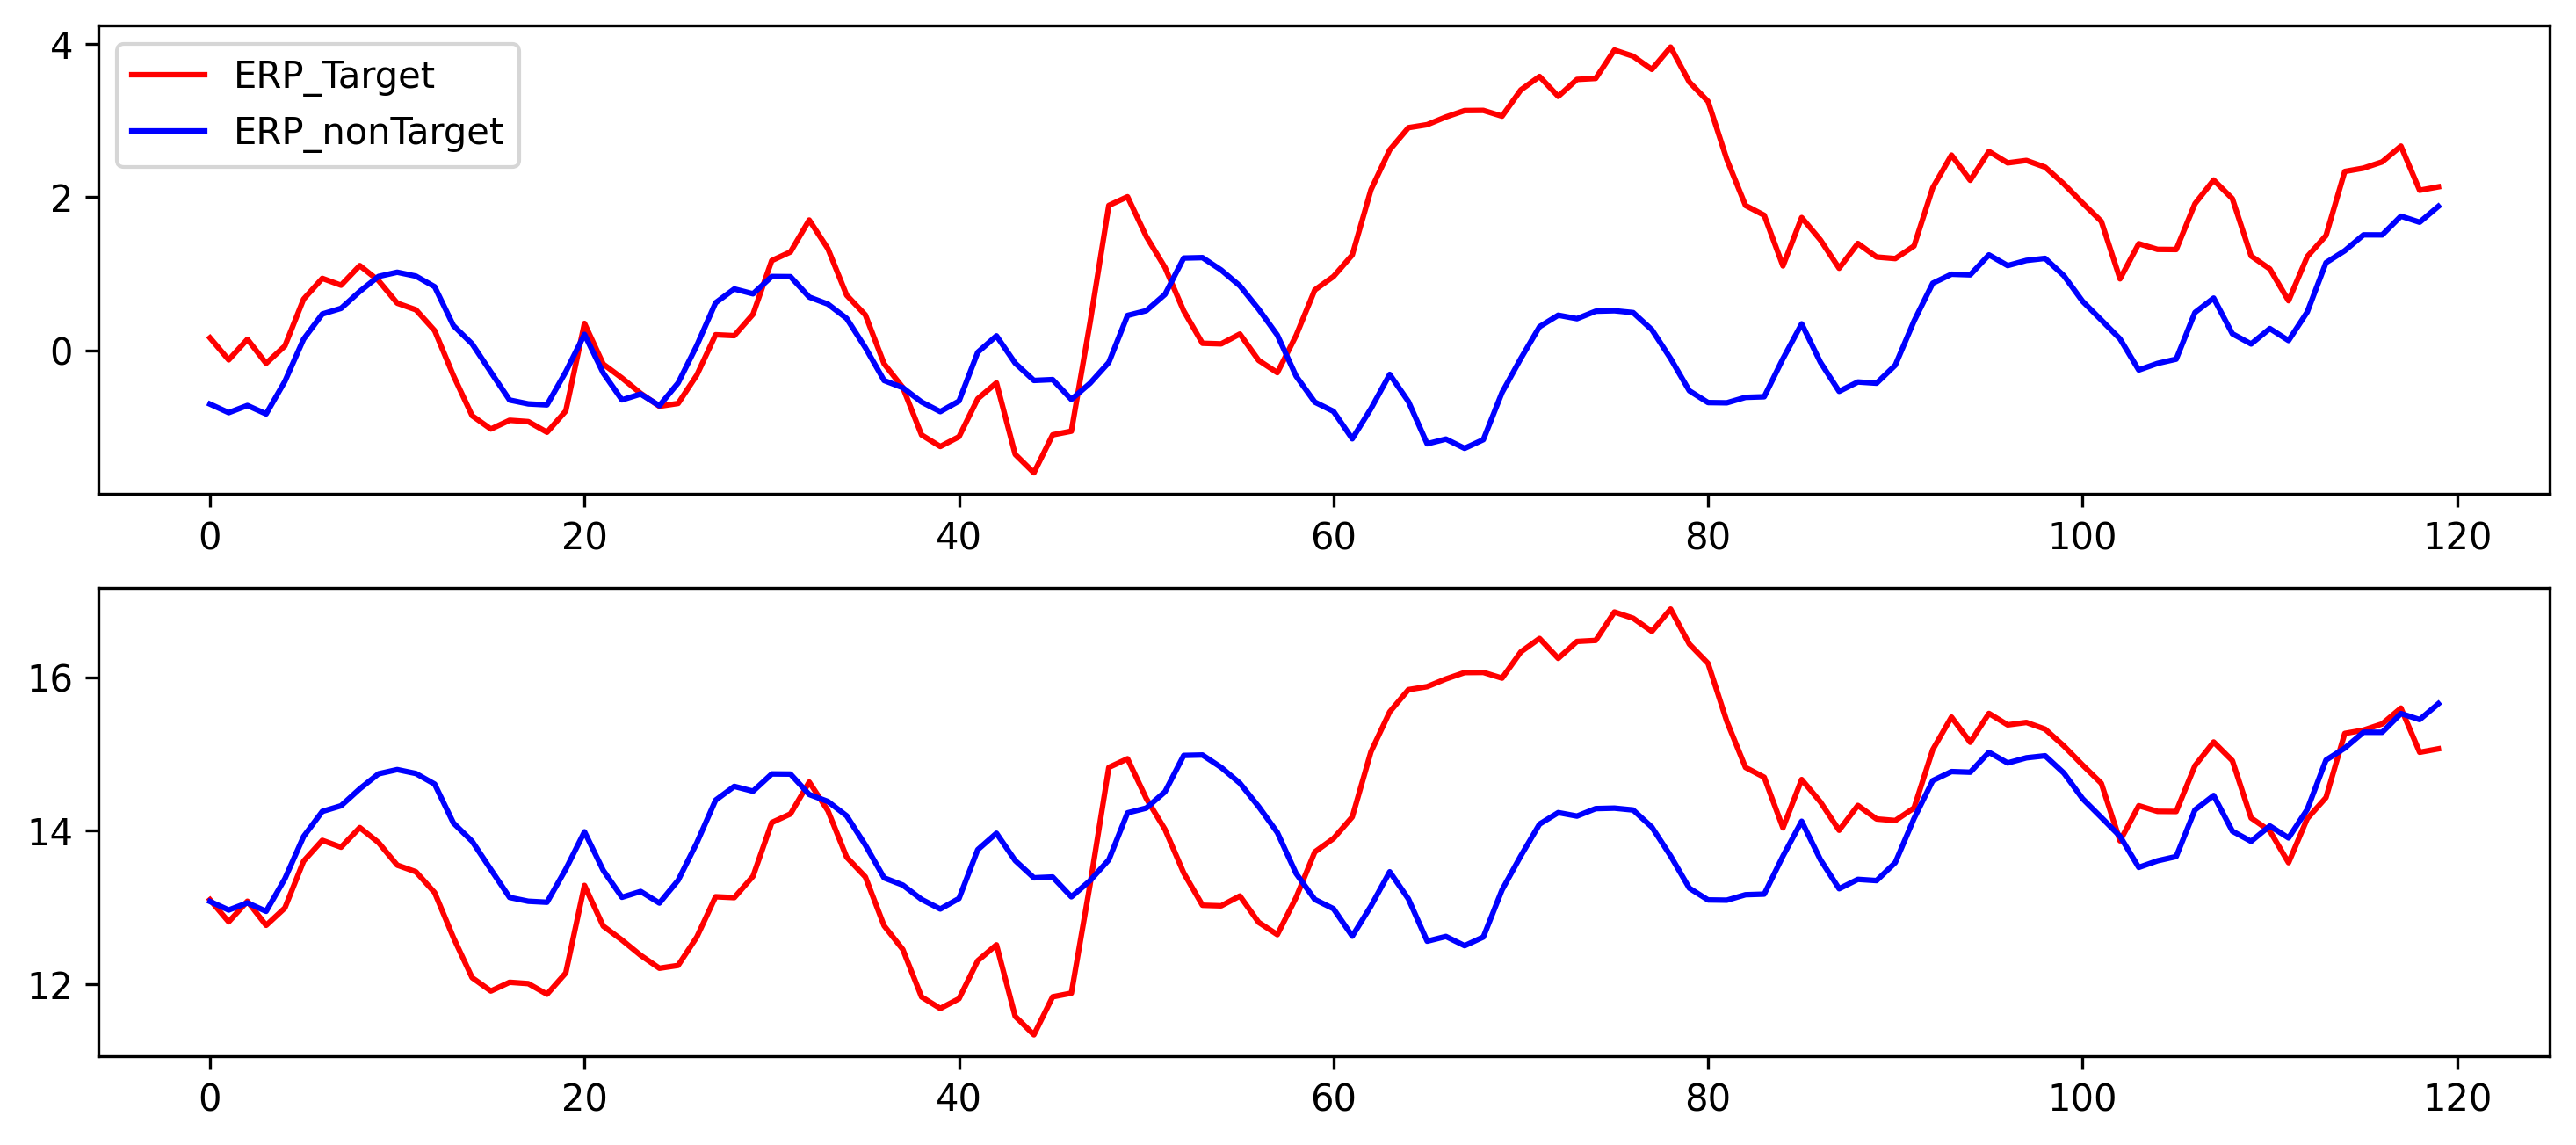

In [9]:
erp_base = np.array(erp_base)

Target = erp_base[Label[0, :] == 1]
ave_Targer = np.mean(Target, 0)

nTarget = erp_base[Label[0, :] == 0]
ave_nTarger = np.mean(nTarget, 0)  

plt.subplot(3, 1, 1)
plt.plot(ave_Targer, 'r')
plt.plot(ave_nTarger, 'b')
plt.legend(['ERP_Target', 'ERP_nonTarget'])

# without baseline correction
erp = np.array(erp)
plt.subplot(3, 1, 2)
plt.plot(np.mean(erp[Label[0, :] == 1], 0), 'r')
plt.plot(np.mean(erp[Label[0, :] == 0], 0), 'b')

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 300 


## Statistical differences between Target and Non-target trials in time-domain
## Feature selection


![r_value.PNG](attachment:r_value.PNG)

"\nTarget2 = erp[Label[0,:] == 1]\nnTarget2 = erp[Label[0,:] == 0]\nx1 = np.mean(Target2, 0)\nx2 = np.mean(nTarget2, 0)\ns = np.std(np.concatenate([Target2,nTarget2]), 0)\n\nr_value = np.divide(np.sqrt(N1*N2)*(x1-x2), s*(N1+N2))\nr_value2 = np.multiply(r_value, np.abs(r_value))\n\nplt.plot(r_value2, 'r')\nplt.legend(['signed r-value'])\n"

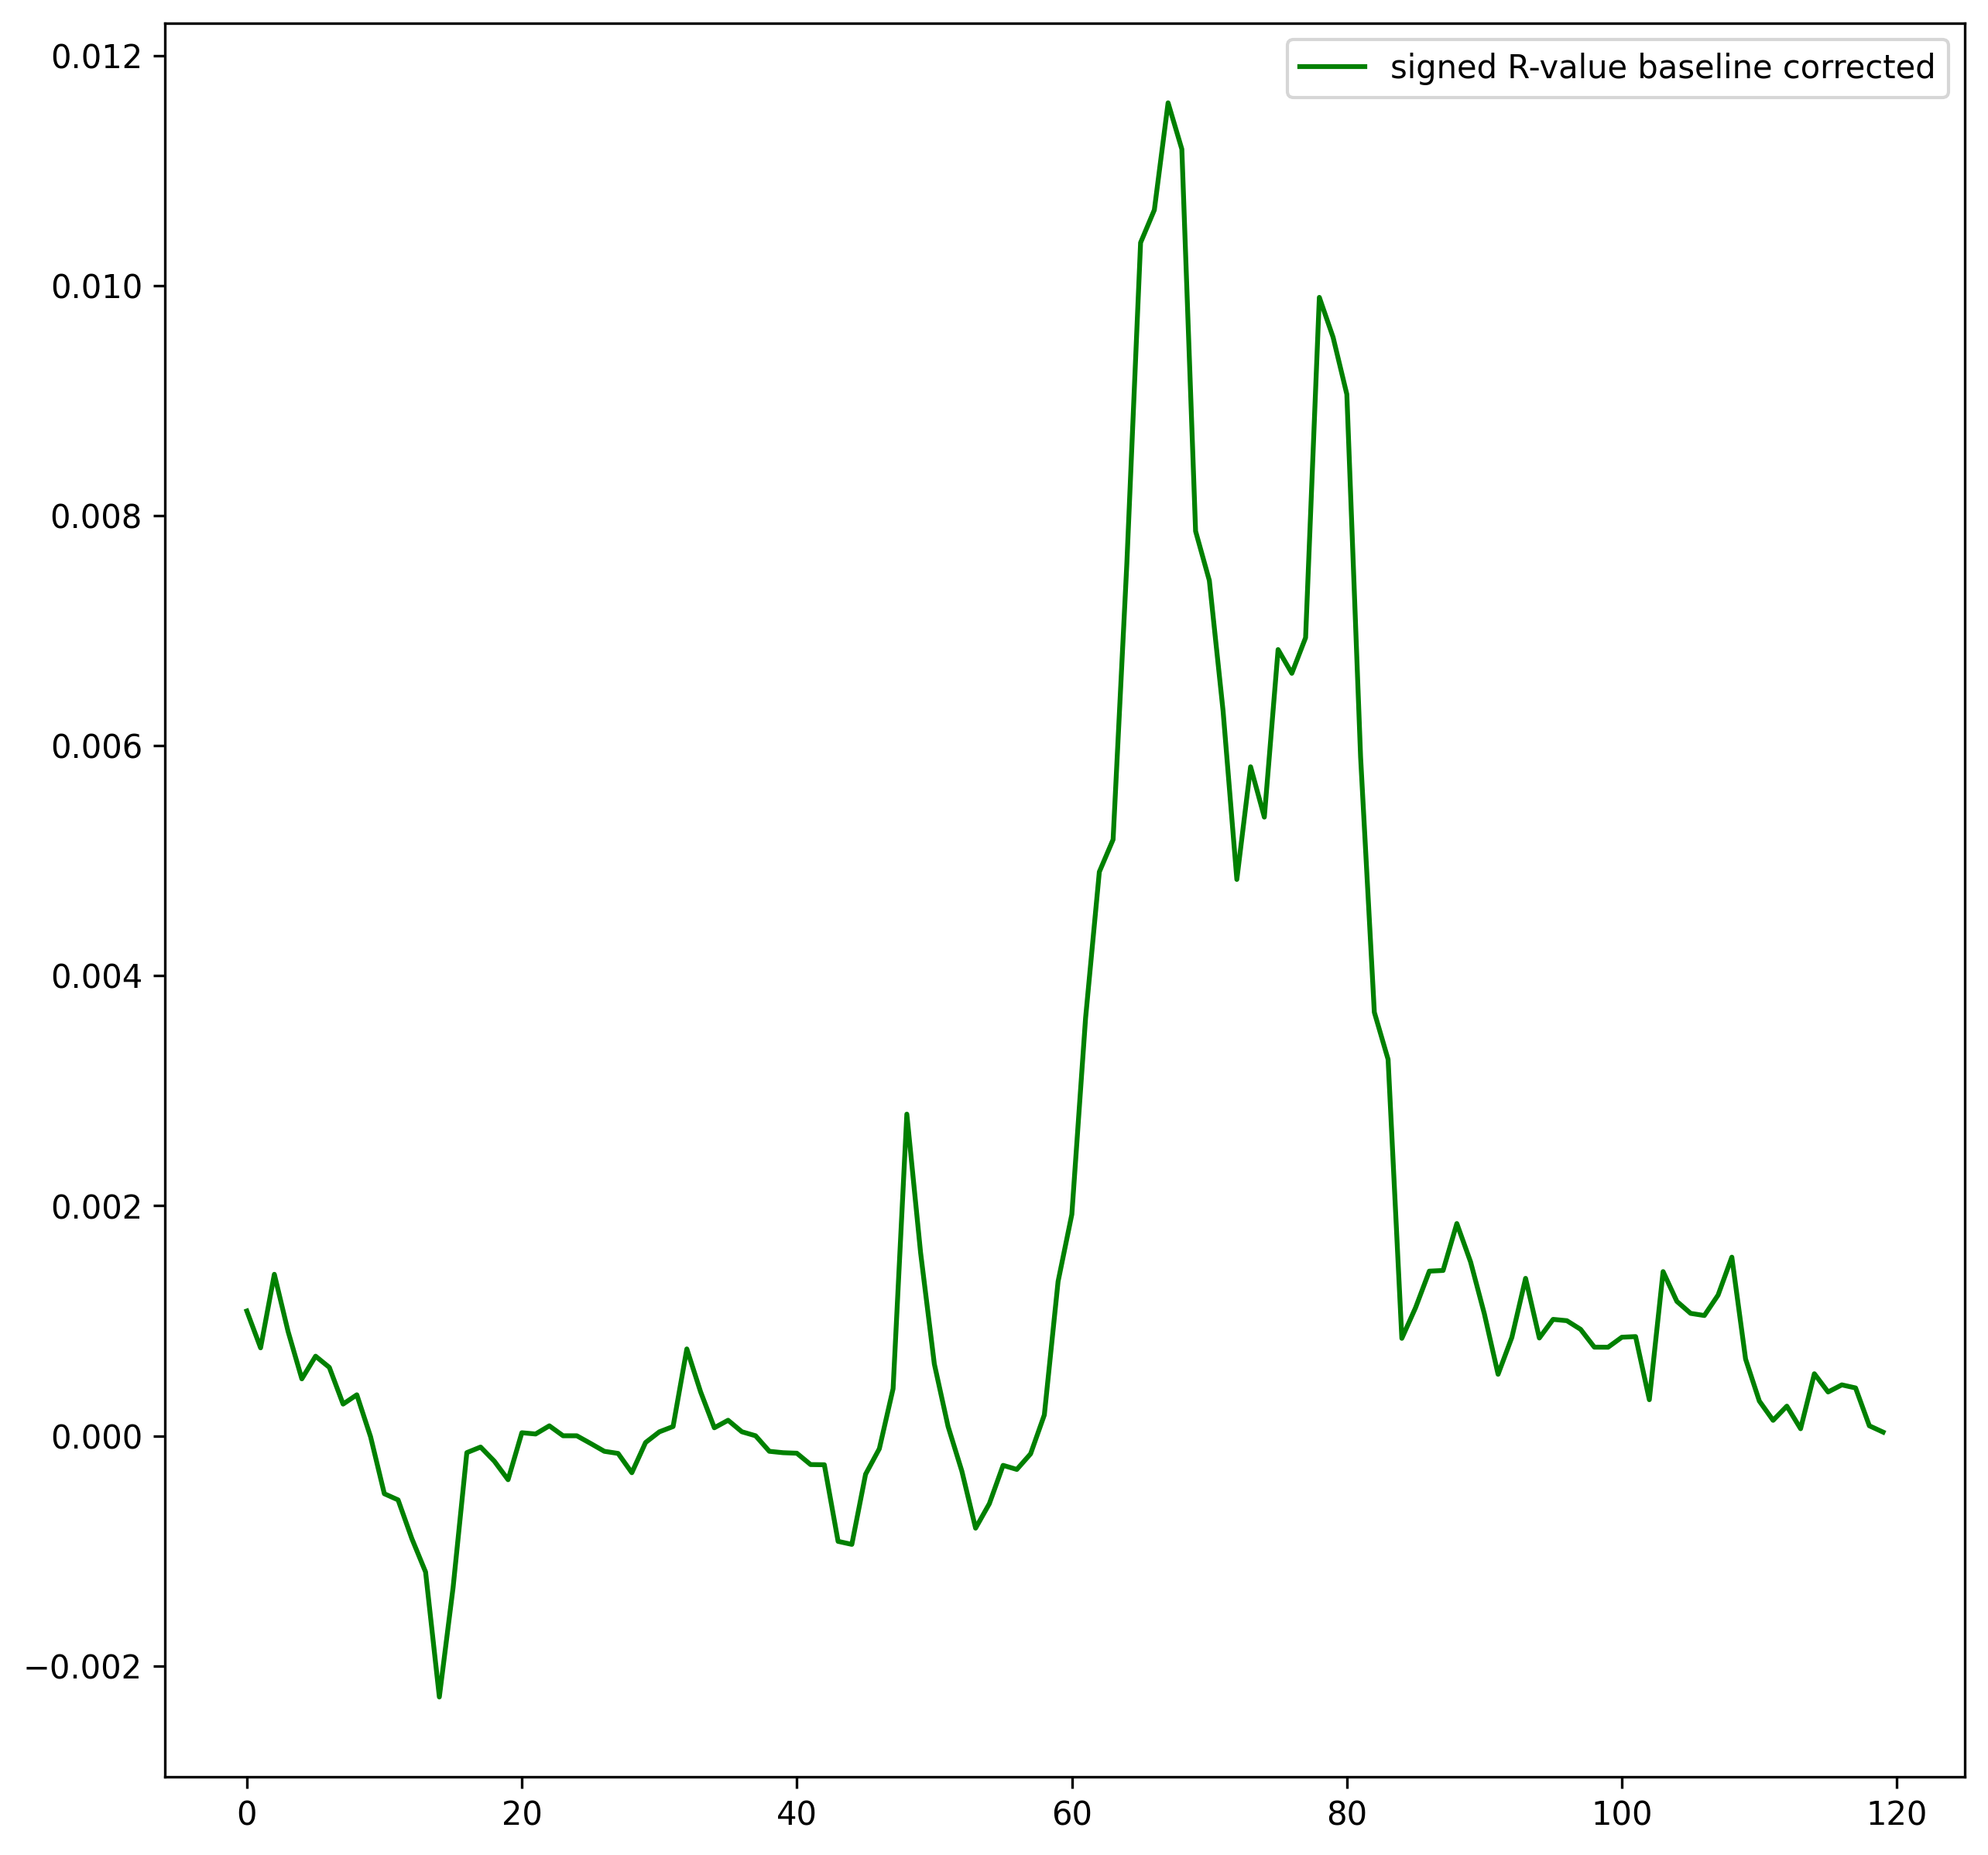

In [24]:
N1 = len(Target)
N2 = len(nTarget)

x1 = np.mean(Target, 0)
x2 = np.mean(nTarget, 0)
s = np.std(np.concatenate([Target, nTarget]), 0)

r_value = np.divide(np.sqrt(N1*N2)*(x1-x2), s*(N1+N2))
r_value2 = np.multiply(r_value, np.abs(r_value))

plt.plot(r_value2, 'g')
plt.legend(['signed R-value baseline corrected'])


'''
Target2 = erp[Label[0,:] == 1]
nTarget2 = erp[Label[0,:] == 0]
x1 = np.mean(Target2, 0)
x2 = np.mean(nTarget2, 0)
s = np.std(np.concatenate([Target2,nTarget2]), 0)

r_value = np.divide(np.sqrt(N1*N2)*(x1-x2), s*(N1+N2))
r_value2 = np.multiply(r_value, np.abs(r_value))

plt.plot(r_value2, 'r')
plt.legend(['signed r-value'])
'''